In [41]:
# Import essential libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Data Loading and Cleaning

In [42]:
# Load dataset
data = pd.read_csv('L1T2_ifood_df.csv')

# Display the first few rows to verify the data loaded correctly
data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [53]:
data.isna().sum()

income                  0
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
age                     0
customer_days           0
marital_divorced        0
marital_married         0
marital_single          0
marital_together        0
marital_widow           0
education_2n_cycle      0
education_basic         0
education_graduation    0
education_master        0
education_phd           0
mnttotal                0
mntregularprods         3
acceptedcmpo

In [44]:
# Check the data structure
data.info()

# Get a summary of the data
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [45]:
# Standardizing column names by replacing spaces with underscores and converting to lowercase
data.columns = data.columns.str.replace(' ', '_').str.lower()

# Verify the updated column names
print(data.columns)


Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'customer_days', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_together', 'marital_widow',
       'education_2n_cycle', 'education_basic', 'education_graduation',
       'education_master', 'education_phd', 'mnttotal', 'mntregularprods',
       'acceptedcmpoverall'],
      dtype='object')


# Data Exploration

In [46]:
# Check for negative values in numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
negative_values = data[numeric_cols].lt(0).sum()

# Display columns with negative values, if any
print("Columns with negative values:\n", negative_values[negative_values > 0])

# Optionally, display rows with negative values
neg_rows = data[data[numeric_cols].lt(0).any(axis=1)]
print(neg_rows)


Columns with negative values:
 mntregularprods    3
dtype: int64
      income  kidhome  teenhome  recency  mntwines  mntfruits  \
1307  6560.0        0         0        2        67         11   
1780  7144.0        0         2       92        81          4   
1949  4428.0        0         1        0        16          4   

      mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  ...  \
1307               26                4                 3           262  ...   
1780               33                5                 2           291  ...   
1949               12                2                 4           321  ...   

      marital_together  marital_widow  education_2n_cycle  education_basic  \
1307                 0              0                   0                0   
1780                 0              0                   0                0   
1949                 0              0                   0                0   

      education_graduation  education_master

In [47]:
# Option 1: Remove rows with negative values
data_cleaned = data[(data[numeric_cols] >= 0).all(axis=1)]

# Option 2: Set negative values to NaN for further handling
data[numeric_cols] = data[numeric_cols].applymap(lambda x: np.nan if x < 0 else x)

In [48]:
# Check the column names again to confirm the exact name for total amount spent
print(data.columns)

Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'customer_days', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_together', 'marital_widow',
       'education_2n_cycle', 'education_basic', 'education_graduation',
       'education_master', 'education_phd', 'mnttotal', 'mntregularprods',
       'acceptedcmpoverall'],
      dtype='object')


In [49]:
data.nunique()

income                  1963
kidhome                    3
teenhome                   3
recency                  100
mntwines                 775
mntfruits                158
mntmeatproducts          551
mntfishproducts          182
mntsweetproducts         176
mntgoldprods             212
numdealspurchases         15
numwebpurchases           15
numcatalogpurchases       13
numstorepurchases         14
numwebvisitsmonth         16
acceptedcmp3               2
acceptedcmp4               2
acceptedcmp5               2
acceptedcmp1               2
acceptedcmp2               2
complain                   2
z_costcontact              1
z_revenue                  1
response                   2
age                       56
customer_days            662
marital_divorced           2
marital_married            2
marital_single             2
marital_together           2
marital_widow              2
education_2n_cycle         2
education_basic            2
education_graduation       2
education_mast

In [ ]:
MntTotal=

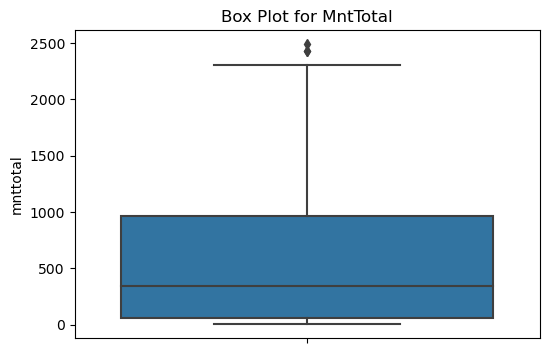

In [56]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='mnttotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('mnttotal')
plt.show()

In [57]:
Q1 = data['mnttotal'].quantile(0.25)
Q3 = data['mnttotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['mnttotal'] < lower_bound) | (data['mnttotal'] > upper_bound)]
outliers.head()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333.0,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458.0,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333.0,1


In [58]:
data = data[(data['mnttotal'] > lower_bound) & (data['mnttotal'] < upper_bound)]
data.describe()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2199.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,517.155980,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.696069,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


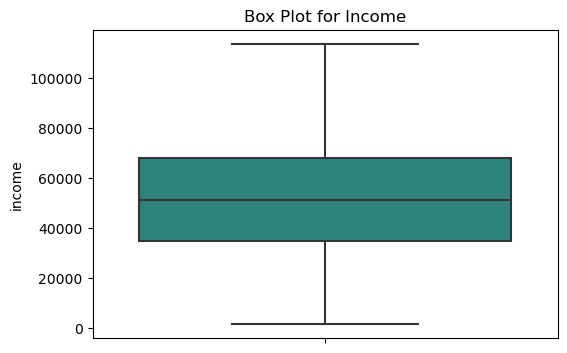

In [60]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('income')
plt.show()

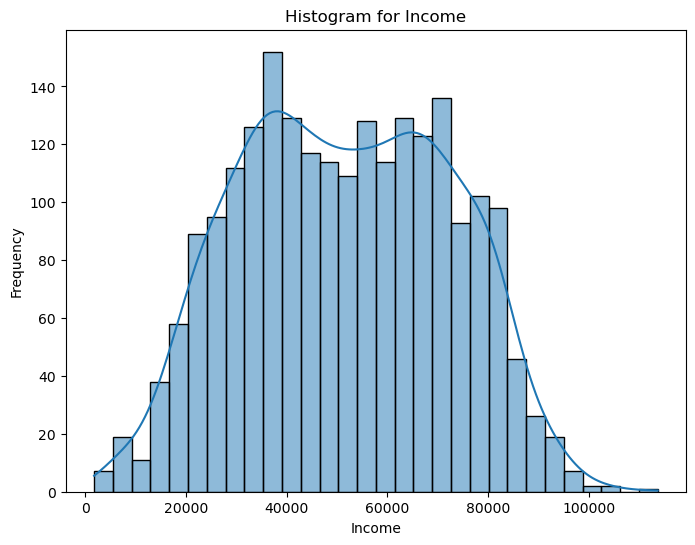

In [62]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

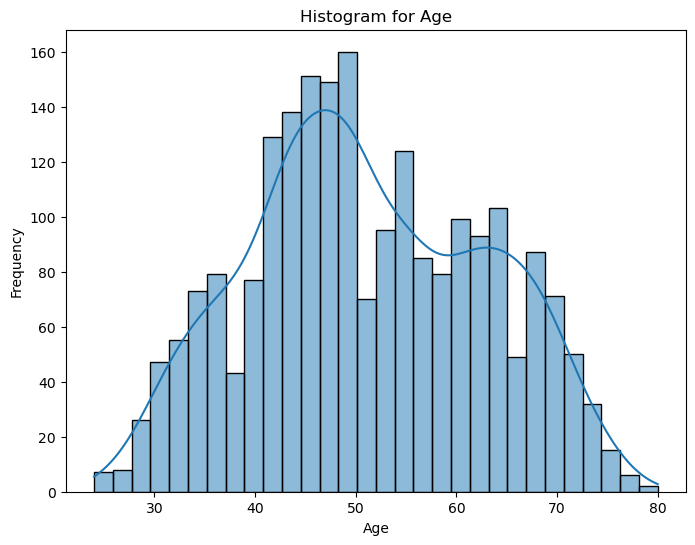

In [63]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [65]:
print("Skewness: %f" % data['age'].skew())
print("Kurtosis: %f" % data['age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


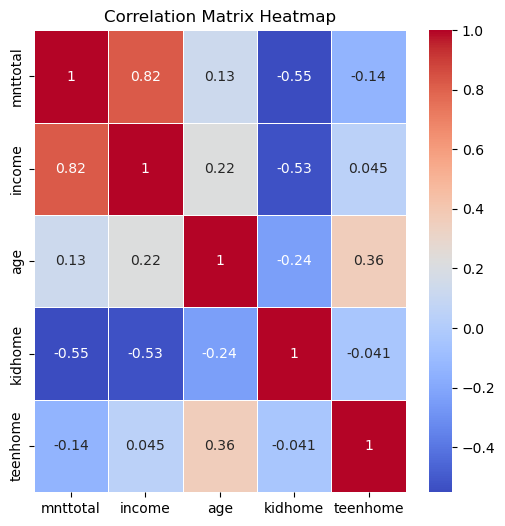

In [67]:
cols_demographics = ['income','age']
cols_children = ['kidhome', 'teenhome']
corr_matrix = data[['mnttotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [77]:
def get_marital_status(row):
    if row['marital_divorced'] == 1:
        return 'Divorced'
    elif row['marital_married'] == 1:
        return 'Married'
    elif row['marital_single'] == 1:
        return 'Single'
    elif row['marital_together'] == 1:
        return 'Together'
    elif row['marital_widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

Text(0, 0.5, 'mnttotal')

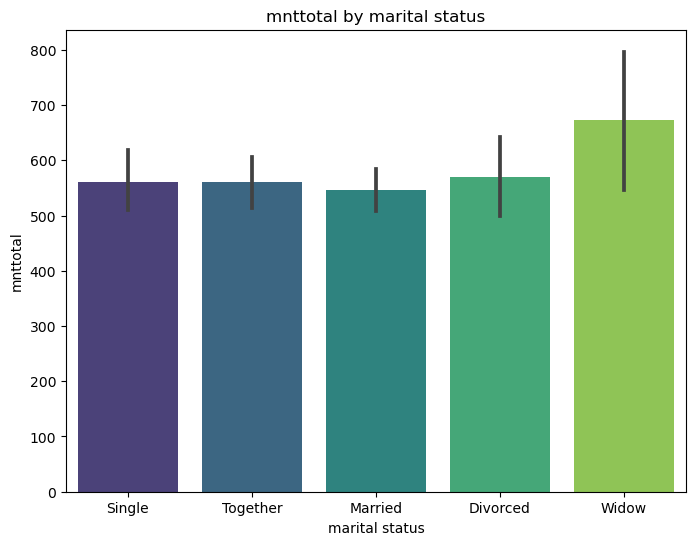

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='mnttotal', data=data, palette='viridis')
plt.title('mnttotal by marital status')
plt.xlabel('marital status')
plt.ylabel('mnttotal')